In [1]:
#!pip install SVC

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import sklearn.metrics
from sklearn.metrics import DistanceMetric
from sklearn.svm import SVC
%matplotlib inline
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, ConfusionMatrixDisplay,
plot_roc_curve,roc_auc_score)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Preprocessing

In [4]:
df = pd.read_csv("MY2010-2014 Fuel Consumption Ratings 5-cycle.csv") # loading the dataset

In [5]:
df.isna().sum() #checking for null values

MODELYEAR                        0
MAKE                             0
MODEL                            0
VEHICLECLASS                     0
ENGINESIZE(L)                    0
CYLINDERS                        0
TRANSMISSION                     0
FUELTYPE                         0
FUELCONSUMPTIONCITY(L/100 km)    0
FUELCONSUMPTIONHWY(L/100 km)     0
FUELCONSUMPTIONCOMB(L/100 km)    0
FUELCONSUMPTIONCOMB(mpg)         0
CO2EMISSIONS(g/km)               0
dtype: int64

In [6]:
df.dropna()
df.isnull().sum() # change is not permanent

MODELYEAR                        0
MAKE                             0
MODEL                            0
VEHICLECLASS                     0
ENGINESIZE(L)                    0
CYLINDERS                        0
TRANSMISSION                     0
FUELTYPE                         0
FUELCONSUMPTIONCITY(L/100 km)    0
FUELCONSUMPTIONHWY(L/100 km)     0
FUELCONSUMPTIONCOMB(L/100 km)    0
FUELCONSUMPTIONCOMB(mpg)         0
CO2EMISSIONS(g/km)               0
dtype: int64

In [7]:
data = df.dropna() # reasigned to a new variable called data
data.isnull().sum()

MODELYEAR                        0
MAKE                             0
MODEL                            0
VEHICLECLASS                     0
ENGINESIZE(L)                    0
CYLINDERS                        0
TRANSMISSION                     0
FUELTYPE                         0
FUELCONSUMPTIONCITY(L/100 km)    0
FUELCONSUMPTIONHWY(L/100 km)     0
FUELCONSUMPTIONCOMB(L/100 km)    0
FUELCONSUMPTIONCOMB(mpg)         0
CO2EMISSIONS(g/km)               0
dtype: int64

In [8]:
df.dropna(inplace = True) # change is permanent(inplace argument set to true)
df.isnull().sum()

MODELYEAR                        0
MAKE                             0
MODEL                            0
VEHICLECLASS                     0
ENGINESIZE(L)                    0
CYLINDERS                        0
TRANSMISSION                     0
FUELTYPE                         0
FUELCONSUMPTIONCITY(L/100 km)    0
FUELCONSUMPTIONHWY(L/100 km)     0
FUELCONSUMPTIONCOMB(L/100 km)    0
FUELCONSUMPTIONCOMB(mpg)         0
CO2EMISSIONS(g/km)               0
dtype: int64

In [9]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE(L),CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTIONCITY(L/100 km),FUELCONSUMPTIONHWY(L/100 km),FUELCONSUMPTIONCOMB(L/100 km),FUELCONSUMPTIONCOMB(mpg),CO2EMISSIONS(g/km)
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
5356,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


<Figure size 1200x800 with 0 Axes>

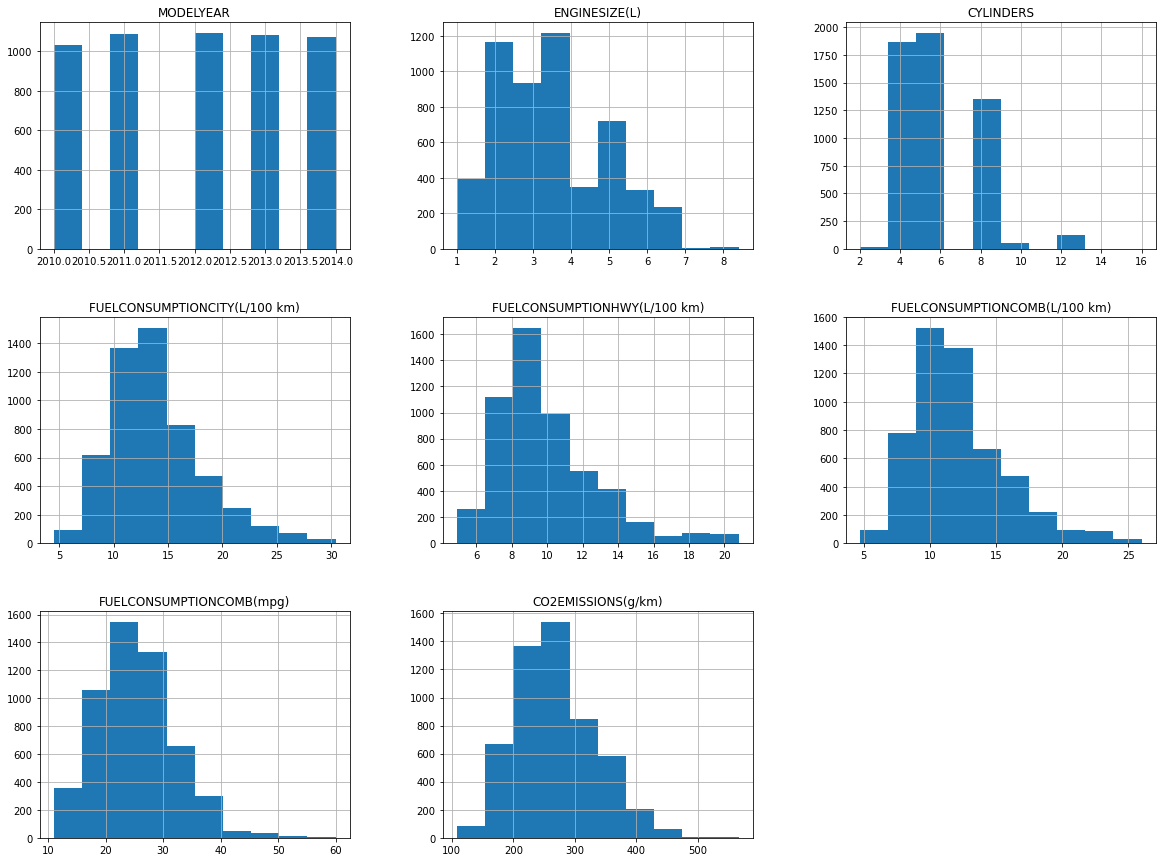

In [10]:
plt.figure(dpi=200)
df.hist(figsize = (20,15))
plt.show()

In [11]:
# fig, ax = plt.subplots(nrows=3, ncols=3, sharey = False)
# df.plot(kind = 'hist', subplots = True, sharex = False, sharey = False, figsize=(15,20) )
# plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

In [12]:
df.describe().transpose() # printing the basic statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,5359.0,2012.014742,1.404536,2010.0,2011.0,2012.0,2013.0,2014.0
ENGINESIZE(L),5359.0,3.491901,1.390957,1.0,2.4,3.5,4.6,8.4
CYLINDERS,5359.0,5.962120,1.872838,2.0,4.0,6.0,8.0,16.0
FUELCONSUMPTIONCITY(L/100 km),5359.0,13.902650,4.162894,4.5,11.0,13.2,16.0,30.4
FUELCONSUMPTIONHWY(L/100 km),5359.0,9.932208,2.807196,4.9,8.0,9.3,11.2,20.8
FUELCONSUMPTIONCOMB(L/100 km),5359.0,12.116328,3.524127,4.7,9.7,11.4,13.9,26.0
FUELCONSUMPTIONCOMB(mpg),5359.0,25.168875,6.956407,11.0,20.0,25.0,29.0,60.0
CO2EMISSIONS(g/km),5359.0,267.660198,64.317040,108.0,221.0,260.0,305.0,566.0


In [13]:
df['FUELCONSUMPTIONCITY(L/100 km)'].fillna(df['FUELCONSUMPTIONCITY(L/100 km)'].median(), inplace = True)
df['FUELCONSUMPTIONHWY(L/100 km)'].fillna(df['FUELCONSUMPTIONHWY(L/100 km)'].median(), inplace = True)
df['FUELCONSUMPTIONCOMB(L/100 km)'].fillna(df['FUELCONSUMPTIONCOMB(L/100 km)'].median(), inplace = True)
df.dropna(subset = ['CYLINDERS'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODELYEAR                      5359 non-null   int64  
 1   MAKE                           5359 non-null   object 
 2   MODEL                          5359 non-null   object 
 3   VEHICLECLASS                   5359 non-null   object 
 4   ENGINESIZE(L)                  5359 non-null   float64
 5   CYLINDERS                      5359 non-null   int64  
 6   TRANSMISSION                   5359 non-null   object 
 7   FUELTYPE                       5359 non-null   object 
 8   FUELCONSUMPTIONCITY(L/100 km)  5359 non-null   float64
 9   FUELCONSUMPTIONHWY(L/100 km)   5359 non-null   float64
 10  FUELCONSUMPTIONCOMB(L/100 km)  5359 non-null   float64
 11  FUELCONSUMPTIONCOMB(mpg)       5359 non-null   int64  
 12  CO2EMISSIONS(g/km)             5359 non-null   i

In [14]:
df.duplicated().sum()

0

In [15]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [16]:
#df['CYLINDERS'] = df['CYLINDERS'].apply(str) # converting CYLINDERS to string since it is categorical in nature

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODELYEAR                      5359 non-null   int64  
 1   MAKE                           5359 non-null   object 
 2   MODEL                          5359 non-null   object 
 3   VEHICLECLASS                   5359 non-null   object 
 4   ENGINESIZE(L)                  5359 non-null   float64
 5   CYLINDERS                      5359 non-null   int64  
 6   TRANSMISSION                   5359 non-null   object 
 7   FUELTYPE                       5359 non-null   object 
 8   FUELCONSUMPTIONCITY(L/100 km)  5359 non-null   float64
 9   FUELCONSUMPTIONHWY(L/100 km)   5359 non-null   float64
 10  FUELCONSUMPTIONCOMB(L/100 km)  5359 non-null   float64
 11  FUELCONSUMPTIONCOMB(mpg)       5359 non-null   int64  
 12  CO2EMISSIONS(g/km)             5359 non-null   i

In [18]:
df.reset_index(inplace = True)
df.drop(df[['index']], axis = 1, inplace = True)

In [19]:
my_object_df = df.select_dtypes(include = 'object') # obtains all the datatypes that are objects 
my_object_df

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,CSX,COMPACT,AS5,X
1,ACURA,CSX,COMPACT,M5,X
2,ACURA,CSX,COMPACT,M6,Z
3,ACURA,MDX AWD,SUV,AS6,Z
4,ACURA,RDX AWD TURBO,SUV,AS5,Z
...,...,...,...,...,...
5354,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
5355,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
5356,VOLVO,XC70 AWD,SUV - SMALL,AS6,X
5357,VOLVO,XC70 AWD,SUV - SMALL,AS6,X


In [20]:
my_numeric_df = df.select_dtypes(exclude ='object') # obtains the numerical data type 
my_numeric_df

,MODELYEAR,ENGINESIZE(L),CYLINDERS,FUELCONSUMPTIONCITY(L/100 km),FUELCONSUMPTIONHWY(L/100 km),FUELCONSUMPTIONCOMB(L/100 km),FUELCONSUMPTIONCOMB(mpg),CO2EMISSIONS(g/km)
0,2010,2.0,4,10.9,7.8,9.5,30,219
1,2010,2.0,4,10.0,7.6,8.9,32,205
2,2010,2.0,4,11.6,8.1,10.0,28,230
3,2010,3.7,6,14.8,11.3,13.2,21,304
4,2010,2.3,4,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...,...
5354,2014,3.0,6,13.4,9.8,11.8,24,271
5355,2014,3.2,6,13.2,9.5,11.5,25,264
5356,2014,3.0,6,13.4,9.8,11.8,24,271
5357,2014,3.2,6,12.9,9.3,11.3,25,260


In [21]:
my_object_df.FUELTYPE.nunique() # checking the number of unique variable

4

In [22]:
df.FUELTYPE.unique()

array(['X', 'Z', 'D', 'E'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [24]:
ohe = OneHotEncoder() # declares an instance of the object 
ohe_data=ohe.fit_transform(my_object_df[['FUELTYPE']]).toarray() # applies the object to data 
feature_labels = ohe.categories_ # the labels are stored here
feature_labels = np.array(feature_labels).ravel()
df_ohe = pd.DataFrame(ohe_data, columns = feature_labels ) # creating a dataframe for the ohe variable
df_ohe.drop('Z', axis = 1, inplace = True) # removing one axis to prevent multicolinearity
new_df_ohe = pd.concat([my_numeric_df,df_ohe], axis = 1) # combining the original dataframe (df) and df_ohe
new_df_ohe

,MODELYEAR,ENGINESIZE(L),CYLINDERS,FUELCONSUMPTIONCITY(L/100 km),FUELCONSUMPTIONHWY(L/100 km),FUELCONSUMPTIONCOMB(L/100 km),FUELCONSUMPTIONCOMB(mpg),CO2EMISSIONS(g/km),D,E,X
0,2010,2.0,4,10.9,7.8,9.5,30,219,0.0,0.0,1.0
1,2010,2.0,4,10.0,7.6,8.9,32,205,0.0,0.0,1.0
2,2010,2.0,4,11.6,8.1,10.0,28,230,0.0,0.0,0.0
3,2010,3.7,6,14.8,11.3,13.2,21,304,0.0,0.0,0.0
4,2010,2.3,4,13.2,10.3,11.9,24,274,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5354,2014,3.0,6,13.4,9.8,11.8,24,271,0.0,0.0,1.0
5355,2014,3.2,6,13.2,9.5,11.5,25,264,0.0,0.0,1.0
5356,2014,3.0,6,13.4,9.8,11.8,24,271,0.0,0.0,1.0
5357,2014,3.2,6,12.9,9.3,11.3,25,260,0.0,0.0,1.0


In [25]:
le = LabelEncoder()# declares an instance of the object
le_data = le.fit_transform(my_object_df[['FUELTYPE']])# applies the object to data
df_le = pd.DataFrame(le_data, columns = ['FUELTYPE']) # creates a dataframe
new_df_le = pd.concat([my_numeric_df,df_le], axis = 1)
new_df_le

C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MODELYEAR,ENGINESIZE(L),CYLINDERS,FUELCONSUMPTIONCITY(L/100 km),FUELCONSUMPTIONHWY(L/100 km),FUELCONSUMPTIONCOMB(L/100 km),FUELCONSUMPTIONCOMB(mpg),CO2EMISSIONS(g/km),FUELTYPE
0,2010,2.0,4,10.9,7.8,9.5,30,219,2
1,2010,2.0,4,10.0,7.6,8.9,32,205,2
2,2010,2.0,4,11.6,8.1,10.0,28,230,3
3,2010,3.7,6,14.8,11.3,13.2,21,304,3
4,2010,2.3,4,13.2,10.3,11.9,24,274,3
...,...,...,...,...,...,...,...,...,...
5354,2014,3.0,6,13.4,9.8,11.8,24,271,2
5355,2014,3.2,6,13.2,9.5,11.5,25,264,2
5356,2014,3.0,6,13.4,9.8,11.8,24,271,2
5357,2014,3.2,6,12.9,9.3,11.3,25,260,2


In [26]:
le = LabelEncoder()# declares an instance of the object
le_data2 = le.fit_transform(my_object_df[['MAKE']])# applies the object to data
le_data3 = le.fit_transform(my_object_df[['MODEL']])
le_data4 = le.fit_transform(my_object_df[['VEHICLECLASS']])
le_data5 = le.fit_transform(my_object_df[['TRANSMISSION']])
le_data = le.fit_transform(my_object_df[['FUELTYPE']])
new_cat_le = pd.DataFrame({'MAKE': le_data2, 'MODEL': le_data3, 'VEHICLECLASS': le_data4, 'TRANSMISSION': le_data5, 'FUELTYPE': le_data}) # creates a dataframe
new_cat_le = pd.concat([new_cat_le, my_numeric_df], axis = 1)
new_cat_le

C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE,MODELYEAR,ENGINESIZE(L),CYLINDERS,FUELCONSUMPTIONCITY(L/100 km),FUELCONSUMPTIONHWY(L/100 km),FUELCONSUMPTIONCOMB(L/100 km),FUELCONSUMPTIONCOMB(mpg),CO2EMISSIONS(g/km)
0,0,352,0,10,2,2010,2.0,4,10.9,7.8,9.5,30,219
1,0,352,0,19,2,2010,2.0,4,10.0,7.6,8.9,32,205
2,0,352,0,20,3,2010,2.0,4,11.6,8.1,10.0,28,230
3,0,734,11,11,3,2010,3.7,6,14.8,11.3,13.2,21,304
4,0,884,11,10,3,2010,2.3,4,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,44,1138,12,11,2,2014,3.0,6,13.4,9.8,11.8,24,271
5355,44,1138,12,11,2,2014,3.2,6,13.2,9.5,11.5,25,264
5356,44,1142,12,11,2,2014,3.0,6,13.4,9.8,11.8,24,271
5357,44,1142,12,11,2,2014,3.2,6,12.9,9.3,11.3,25,260


# Exploratory Data Analyses

<AxesSubplot:>

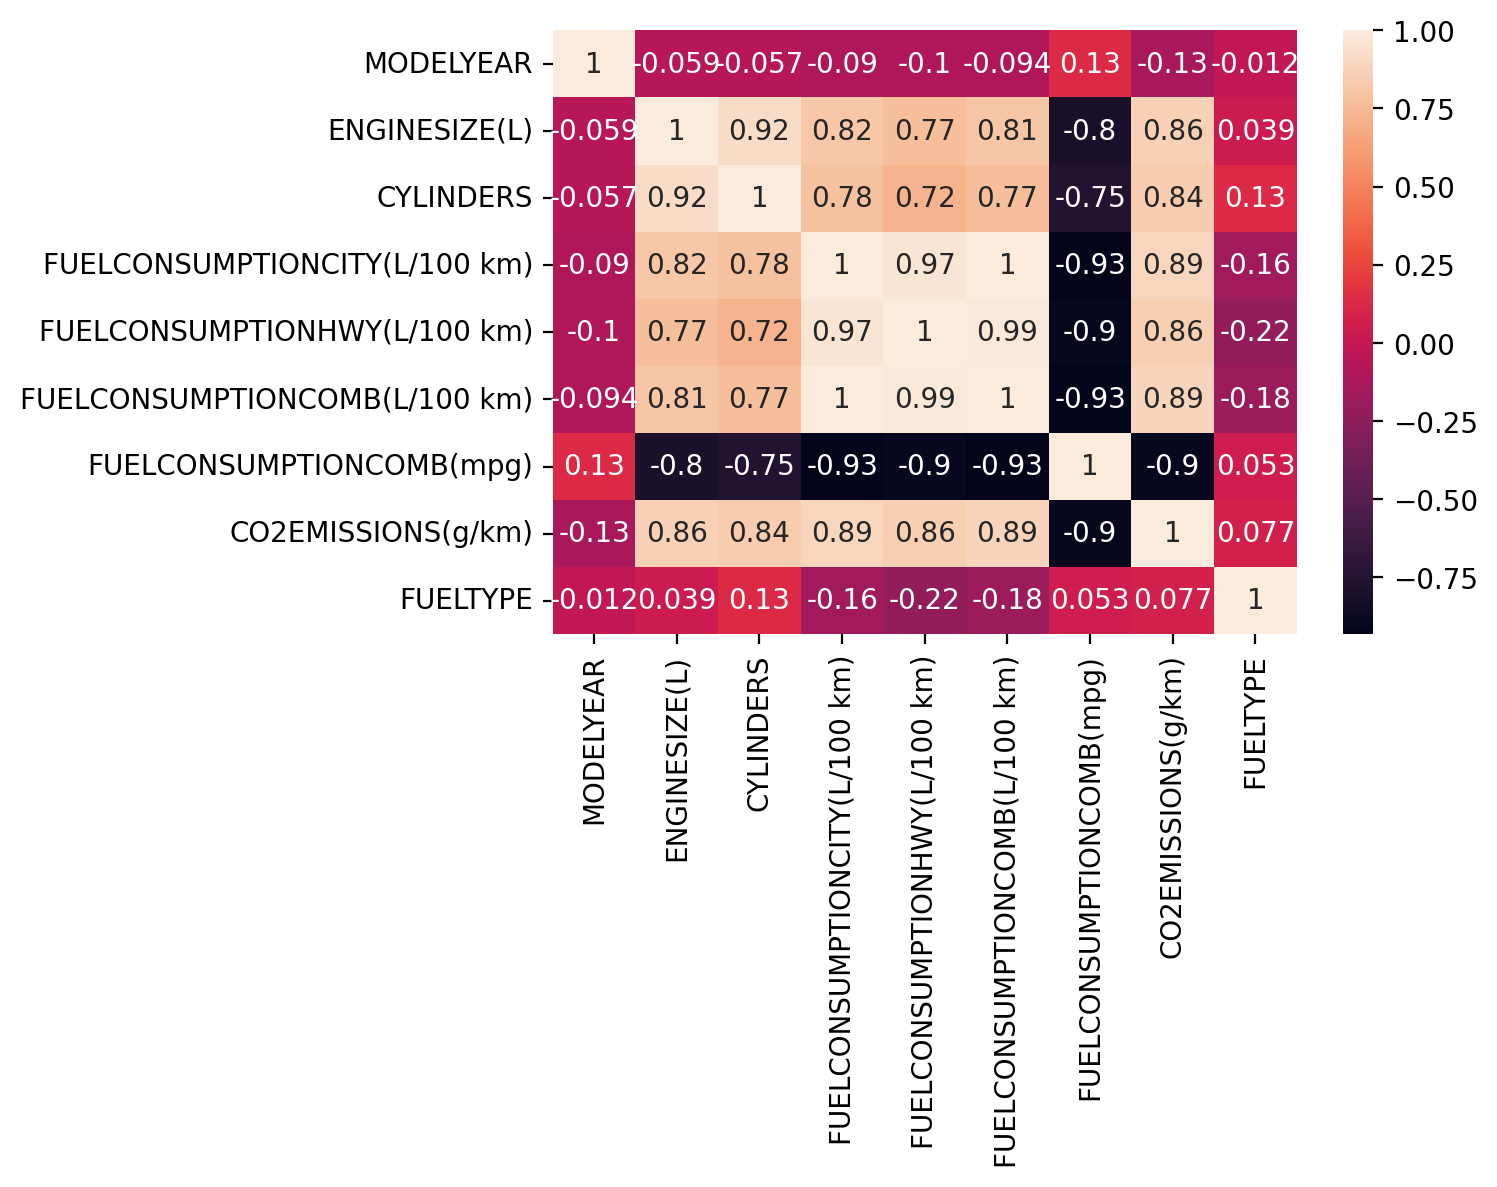

In [27]:
plt.figure(dpi=200)
sns.heatmap(new_df_le.corr(), annot = True) # checking for correlation to see if any of the variables have strong relationship

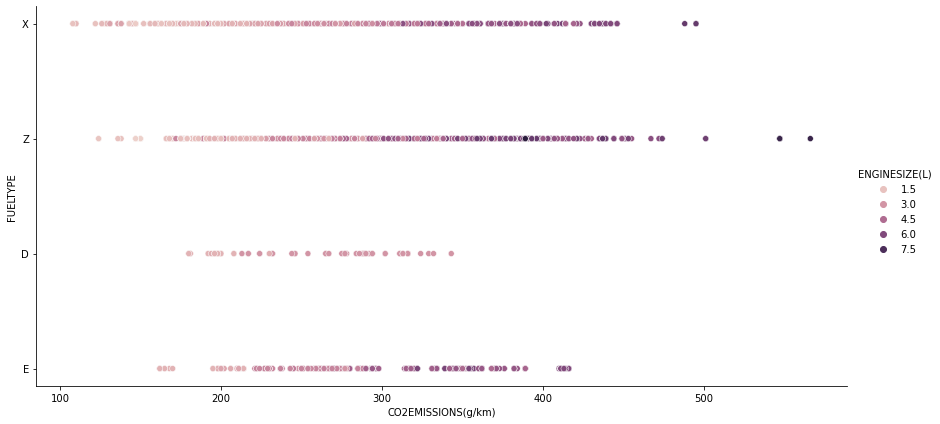

In [28]:
co2_plot = sns.relplot(data=df, x = 'CO2EMISSIONS(g/km)', y = 'FUELTYPE', hue = 'ENGINESIZE(L)', height = 6, aspect = 2)

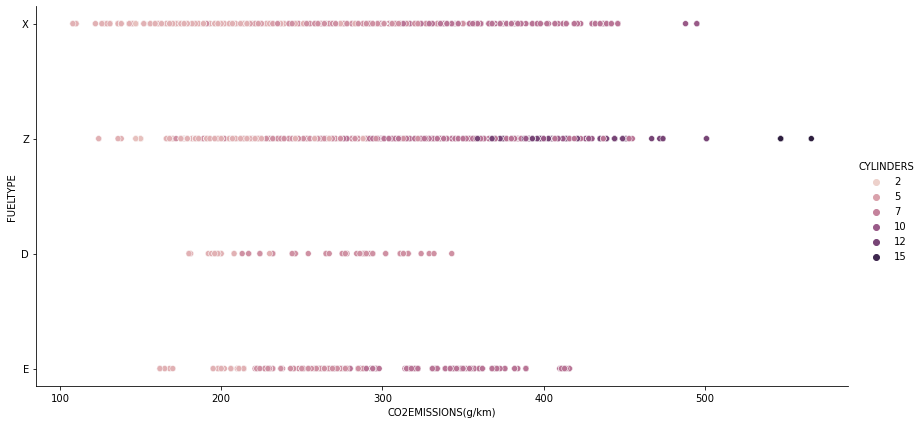

In [29]:
co2_plot2 = sns.relplot(data=df, x = 'CO2EMISSIONS(g/km)', y = 'FUELTYPE', hue = 'CYLINDERS', height = 6, aspect = 2)

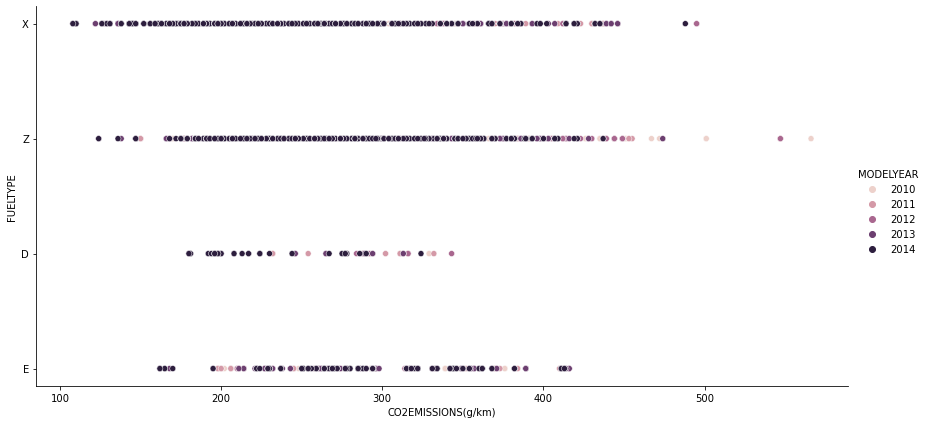

In [30]:
co2_plot3 = sns.relplot(data=df, x = 'CO2EMISSIONS(g/km)', y = 'FUELTYPE', hue = 'MODELYEAR', height = 6, aspect = 2)

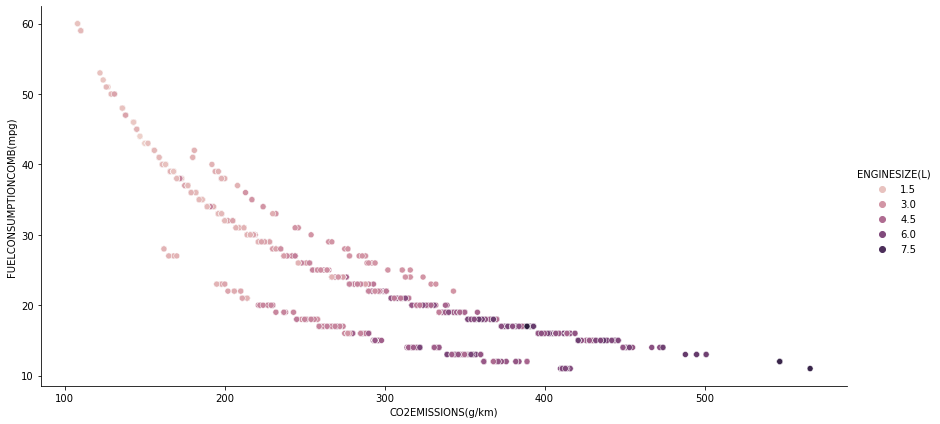

In [31]:
co2_plot4 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS(g/km)', y = 'FUELCONSUMPTIONCOMB(mpg)', hue = 'ENGINESIZE(L)', height = 6, aspect = 2)

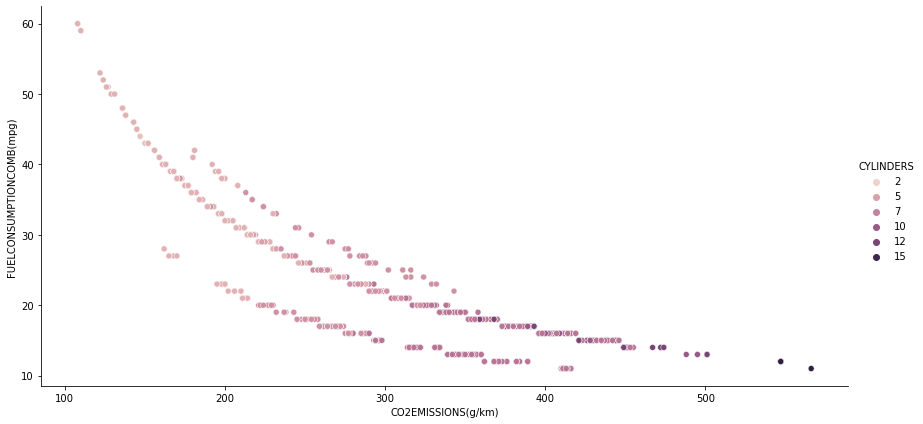

In [32]:
co2_plot5 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS(g/km)', y = 'FUELCONSUMPTIONCOMB(mpg)', hue = 'CYLINDERS', height = 6, aspect = 2)

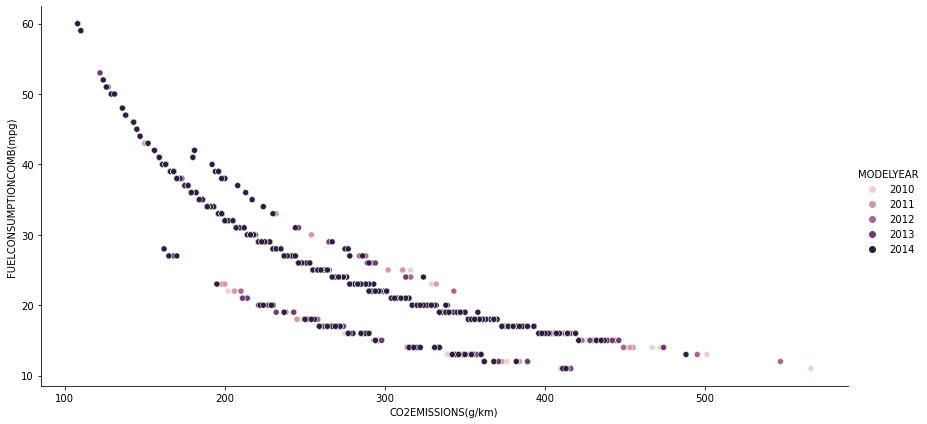

In [33]:
co2_plot6 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS(g/km)', y = 'FUELCONSUMPTIONCOMB(mpg)', hue = 'MODELYEAR', height = 6, aspect = 2)

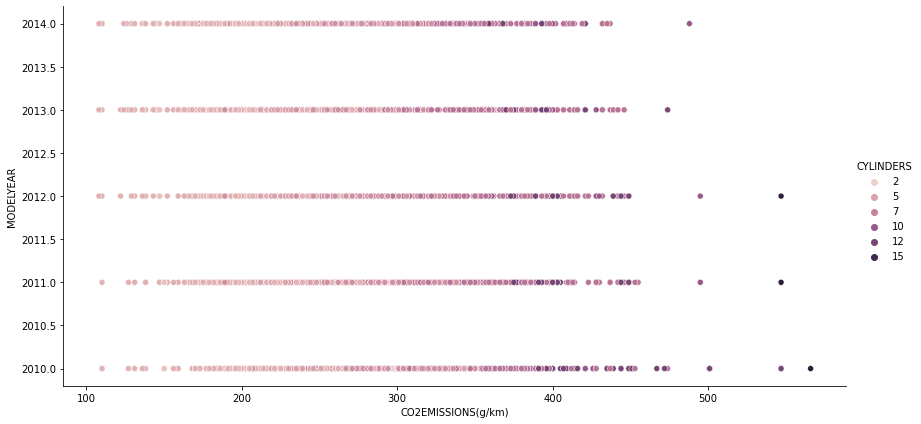

In [34]:
co2_plot7 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS(g/km)', y = 'MODELYEAR', hue = 'CYLINDERS', height = 6, aspect = 2)

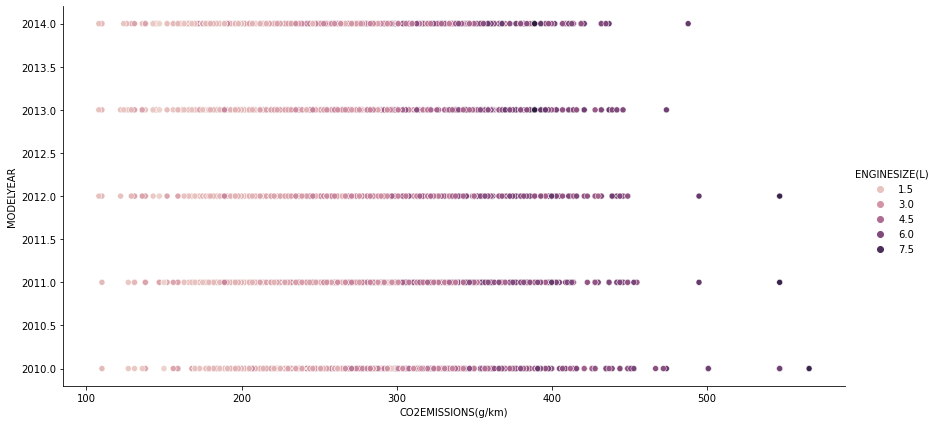

In [35]:
co2_plot8 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS(g/km)', y = 'MODELYEAR', hue = 'ENGINESIZE(L)', height = 6, aspect = 2)

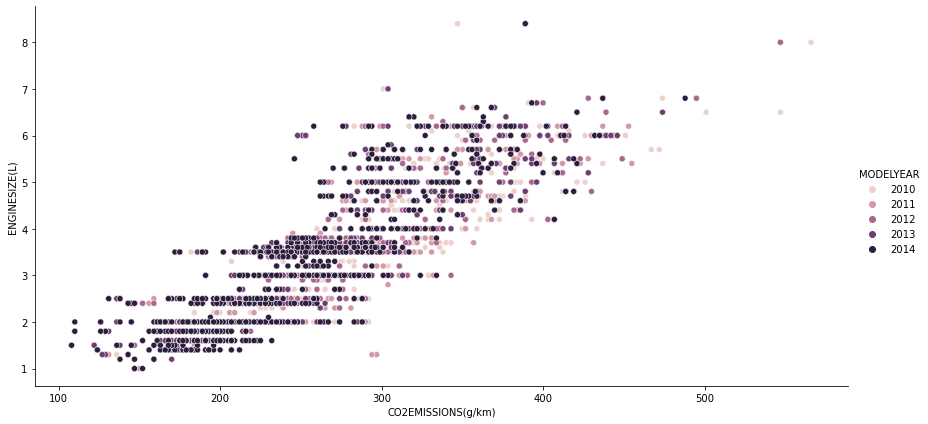

In [36]:
co2_plot9 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS(g/km)', y = 'ENGINESIZE(L)', hue = 'MODELYEAR', height = 6, aspect = 2)

In [37]:
model_grp = new_df_le.groupby('MODELYEAR')['CO2EMISSIONS(g/km)'].mean()
model_grp

MODELYEAR
2010    278.017476
2011    274.428571
2012    269.663611
2013    260.419593
2014    256.116713
Name: CO2EMISSIONS(g/km), dtype: float64

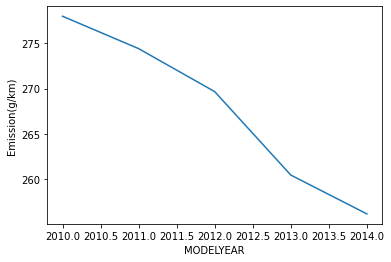

In [38]:
new_df_le.groupby('MODELYEAR')['CO2EMISSIONS(g/km)'].mean().plot(kind='line')
plt.ylabel("Emission(g/km)")
plt.show()

In [39]:
new_df_le.columns # obtaining the name of the columns

Index(['MODELYEAR', 'ENGINESIZE(L)', 'CYLINDERS',
       'FUELCONSUMPTIONCITY(L/100 km)', 'FUELCONSUMPTIONHWY(L/100 km)',
       'FUELCONSUMPTIONCOMB(L/100 km)', 'FUELCONSUMPTIONCOMB(mpg)',
       'CO2EMISSIONS(g/km)', 'FUELTYPE'],
      dtype='object')

# Building the Model

### Train Data Distribution

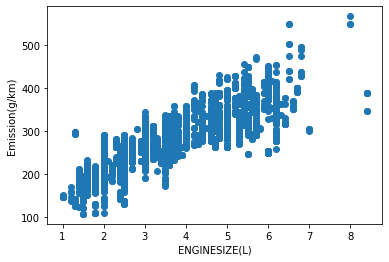

In [40]:
plt.scatter(data=new_df_le, x='ENGINESIZE(L)', y='CO2EMISSIONS(g/km)')
plt.xlabel("ENGINESIZE(L)")
plt.ylabel("Emission(g/km)")
plt.show()

### Modeling

In [41]:
X = new_df_le.drop(['CO2EMISSIONS(g/km)', 'MODELYEAR'], axis = 1)
y = new_df_le['CO2EMISSIONS(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
a = new_df_le.drop(['CO2EMISSIONS(g/km)', 'FUELCONSUMPTIONCITY(L/100 km)', 'FUELCONSUMPTIONHWY(L/100 km)', 'FUELCONSUMPTIONCOMB(L/100 km)'], axis = 1)
b = new_df_le['CO2EMISSIONS(g/km)']
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42) 
a,b=a_train,b_train
a_train, a_val, b_train, b_val = train_test_split(a, b, test_size=0.2, random_state=42)

In [43]:
engine = new_df_le.drop(['CO2EMISSIONS(g/km)', 'FUELCONSUMPTIONCITY(L/100 km)', 'FUELCONSUMPTIONHWY(L/100 km)',
                    'FUELCONSUMPTIONCOMB(L/100 km)', 'CYLINDERS', 'FUELCONSUMPTIONCOMB(mpg)',
                   'FUELTYPE', 'MODELYEAR'], axis = 1)
oxide = new_df_le['CO2EMISSIONS(g/km)']
engine_train, engine_test, oxide_train, oxide_test = train_test_split(engine, oxide, test_size=0.2, random_state=42) 
engine,oxide=engine_train,oxide_train
engine_train, engine_val, oxide_train, oxide_val = train_test_split(engine, oxide, test_size=0.2, random_state=42)

In [44]:
#Instantiate scaler. Use Either
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

In [45]:
# Fit and Transform train dataset; Transform on X_test & X_val
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)
X_val = mm_scaler.transform(X_val)

In [46]:
# Fit and Transform train dataset; Transform on a_test & a_val
a_train = mm_scaler.fit_transform(a_train)
a_test = mm_scaler.transform(a_test)
a_val = mm_scaler.transform(a_val)

In [47]:
# Fit and Transform train dataset; Transform on a_test & a_val
engine_train = mm_scaler.fit_transform(engine_train)
engine_test = mm_scaler.transform(engine_test)
engine_val = mm_scaler.transform(engine_val)

In [48]:
#Instantiate the base models
lin = linear_model.LinearRegression()
rf = RandomForestRegressor()
bag = BaggingRegressor()
ext = ExtraTreesRegressor()
dt = DecisionTreeRegressor()

### Multiple Linear Regression

In [49]:
# The model test report
def report_model_test_x(model):
    model.fit(X_train,y_train)
    basem_preds = model.predict(X_test)
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test,basem_preds)
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")

In [50]:
report_model_test_x(lin)

The result of the mean_absolute_error is: 15.03
The result of the root mean squared error is : 21.51
The result of the coefficient of determination is: 0.89


In [51]:
# The model test report
def report_model_test_a(model):
    model.fit(a_train,b_train)
    basem_preds = model.predict(a_test)
    mean_abs = mean_absolute_error(b_test,basem_preds)
    mean_squared = mean_squared_error(b_test,basem_preds)
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")

In [52]:
report_model_test_a(lin)

The result of the mean_absolute_error is: 15.51
The result of the root mean squared error is : 22.64
The result of the coefficient of determination is: 0.88


### Simple Regression Model

In [53]:
# The model test report
def report_model_test_engine(model):
    model.fit(engine_train,oxide_train)
    basem_preds = model.predict(engine_test)
    mean_abs = mean_absolute_error(oxide_test,basem_preds)
    mean_squared = mean_squared_error(oxide_test,basem_preds)
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")

In [54]:
report_model_test_engine(lin)

The result of the mean_absolute_error is: 24.48
The result of the root mean squared error is : 33.08
The result of the coefficient of determination is: 0.73


###  Random Forest Regressor

In [55]:
report_model_test_x(rf)

The result of the mean_absolute_error is: 0.30
The result of the root mean squared error is : 2.17
The result of the coefficient of determination is: 1.00


In [56]:
report_model_test_a(rf)

The result of the mean_absolute_error is: 2.52
The result of the root mean squared error is : 3.87
The result of the coefficient of determination is: 1.00


### Simple Random Forest Regressor

In [57]:
report_model_test_engine(rf)

The result of the mean_absolute_error is: 21.85
The result of the root mean squared error is : 29.83
The result of the coefficient of determination is: 0.78


### Multiple Bagging Regressor

In [58]:
report_model_test_x(bag)

The result of the mean_absolute_error is: 0.38
The result of the root mean squared error is : 3.22
The result of the coefficient of determination is: 1.00


In [59]:
report_model_test_a(bag)

The result of the mean_absolute_error is: 2.62
The result of the root mean squared error is : 4.34
The result of the coefficient of determination is: 1.00


### Simple Bagging Regressor

In [60]:
report_model_test_engine(bag)

The result of the mean_absolute_error is: 22.00
The result of the root mean squared error is : 30.07
The result of the coefficient of determination is: 0.78


### Multiple Extra Tree Regressor

In [61]:
report_model_test_x(ext)

The result of the mean_absolute_error is: 0.14
The result of the root mean squared error is : 0.73
The result of the coefficient of determination is: 1.00


In [62]:
report_model_test_a(ext)

The result of the mean_absolute_error is: 2.43
The result of the root mean squared error is : 3.66
The result of the coefficient of determination is: 1.00


### Simple Extra Tree Regressor

In [63]:
report_model_test_engine(ext)

The result of the mean_absolute_error is: 21.81
The result of the root mean squared error is : 29.81
The result of the coefficient of determination is: 0.78


### Multiple Decision Tree Regressor

In [64]:
report_model_test_x(dt)

The result of the mean_absolute_error is: 0.24
The result of the root mean squared error is : 4.25
The result of the coefficient of determination is: 1.00


In [65]:
report_model_test_a(dt)

The result of the mean_absolute_error is: 2.42
The result of the root mean squared error is : 3.70
The result of the coefficient of determination is: 1.00


### Simple Decision Tree Regressor

In [66]:
report_model_test_engine(dt)

The result of the mean_absolute_error is: 21.81
The result of the root mean squared error is : 29.81
The result of the coefficient of determination is: 0.78


In [67]:
params = {
    'max_depth': [10,20,30],
#     'max_features': [2,3,4]
}

CV = GridSearchCV(ext, params)  #run grid search cross validation to choose the best parametesr for the extratreeregressor

In [68]:
CV.fit(X_train, y_train)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20, 30]})

In [69]:
# The model test report
def model_test(model,X, y):
    y_preds = model.predict(X)
    mean_abs = mean_absolute_error(y,y_preds)
    mean_squared = mean_squared_error(y,y_preds)
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y,y_preds):.2f}")

In [70]:
CV.best_params_

{'max_depth': 30}

In [71]:
model_test(CV, X_test, y_test)

The result of the mean_absolute_error is: 0.13
The result of the root mean squared error is : 0.80
The result of the coefficient of determination is: 1.00


In [72]:
model_test(CV, X_val, y_val)

The result of the mean_absolute_error is: 0.19
The result of the root mean squared error is : 2.27
The result of the coefficient of determination is: 1.00


In [73]:
feature_importance = CV.best_estimator_.feature_importances_
feature_importance = pd.DataFrame(feature_importance, index=X.columns,columns = ['features']).sort_values('features',ascending=False)

In [74]:
feature_importance

,features
FUELCONSUMPTIONCOMB(mpg),0.209623
FUELCONSUMPTIONCOMB(L/100 km),0.207128
FUELCONSUMPTIONCITY(L/100 km),0.191956
ENGINESIZE(L),0.128905
FUELCONSUMPTIONHWY(L/100 km),0.118095
CYLINDERS,0.083075
FUELTYPE,0.061219


## Classification of the Dataset

In [75]:
def onehot_encode(train_set, val_set):

    cat_cols = [x for x in train_set.columns if train_set[x].dtype==object]

    encoder = OneHotEncoder(handle_unknown='ignore')

    train_cat_encoded = encoder.fit_transform(train_set[cat_cols]).toarray()
    val_cat_encoded = encoder.transform(val_set[cat_cols]).toarray()

    feature_names = encoder.get_feature_names_out()

    train_cat_encoded = pd.DataFrame(train_cat_encoded, columns=feature_names, 
                                       index=train_set.index)

    val_cat_encoded = pd.DataFrame(val_cat_encoded, columns=feature_names, 
                                     index=val_set.index)

    train_set_encoded = pd.concat([train_set, train_cat_encoded], axis=1)
    train_set_encoded.drop(cat_cols, axis=1, inplace=True)

    val_set_encoded = pd.concat([val_set, val_cat_encoded], axis=1)
    val_set_encoded.drop(cat_cols, axis=1, inplace=True)

    return train_set_encoded, val_set_encoded

### Fueltype

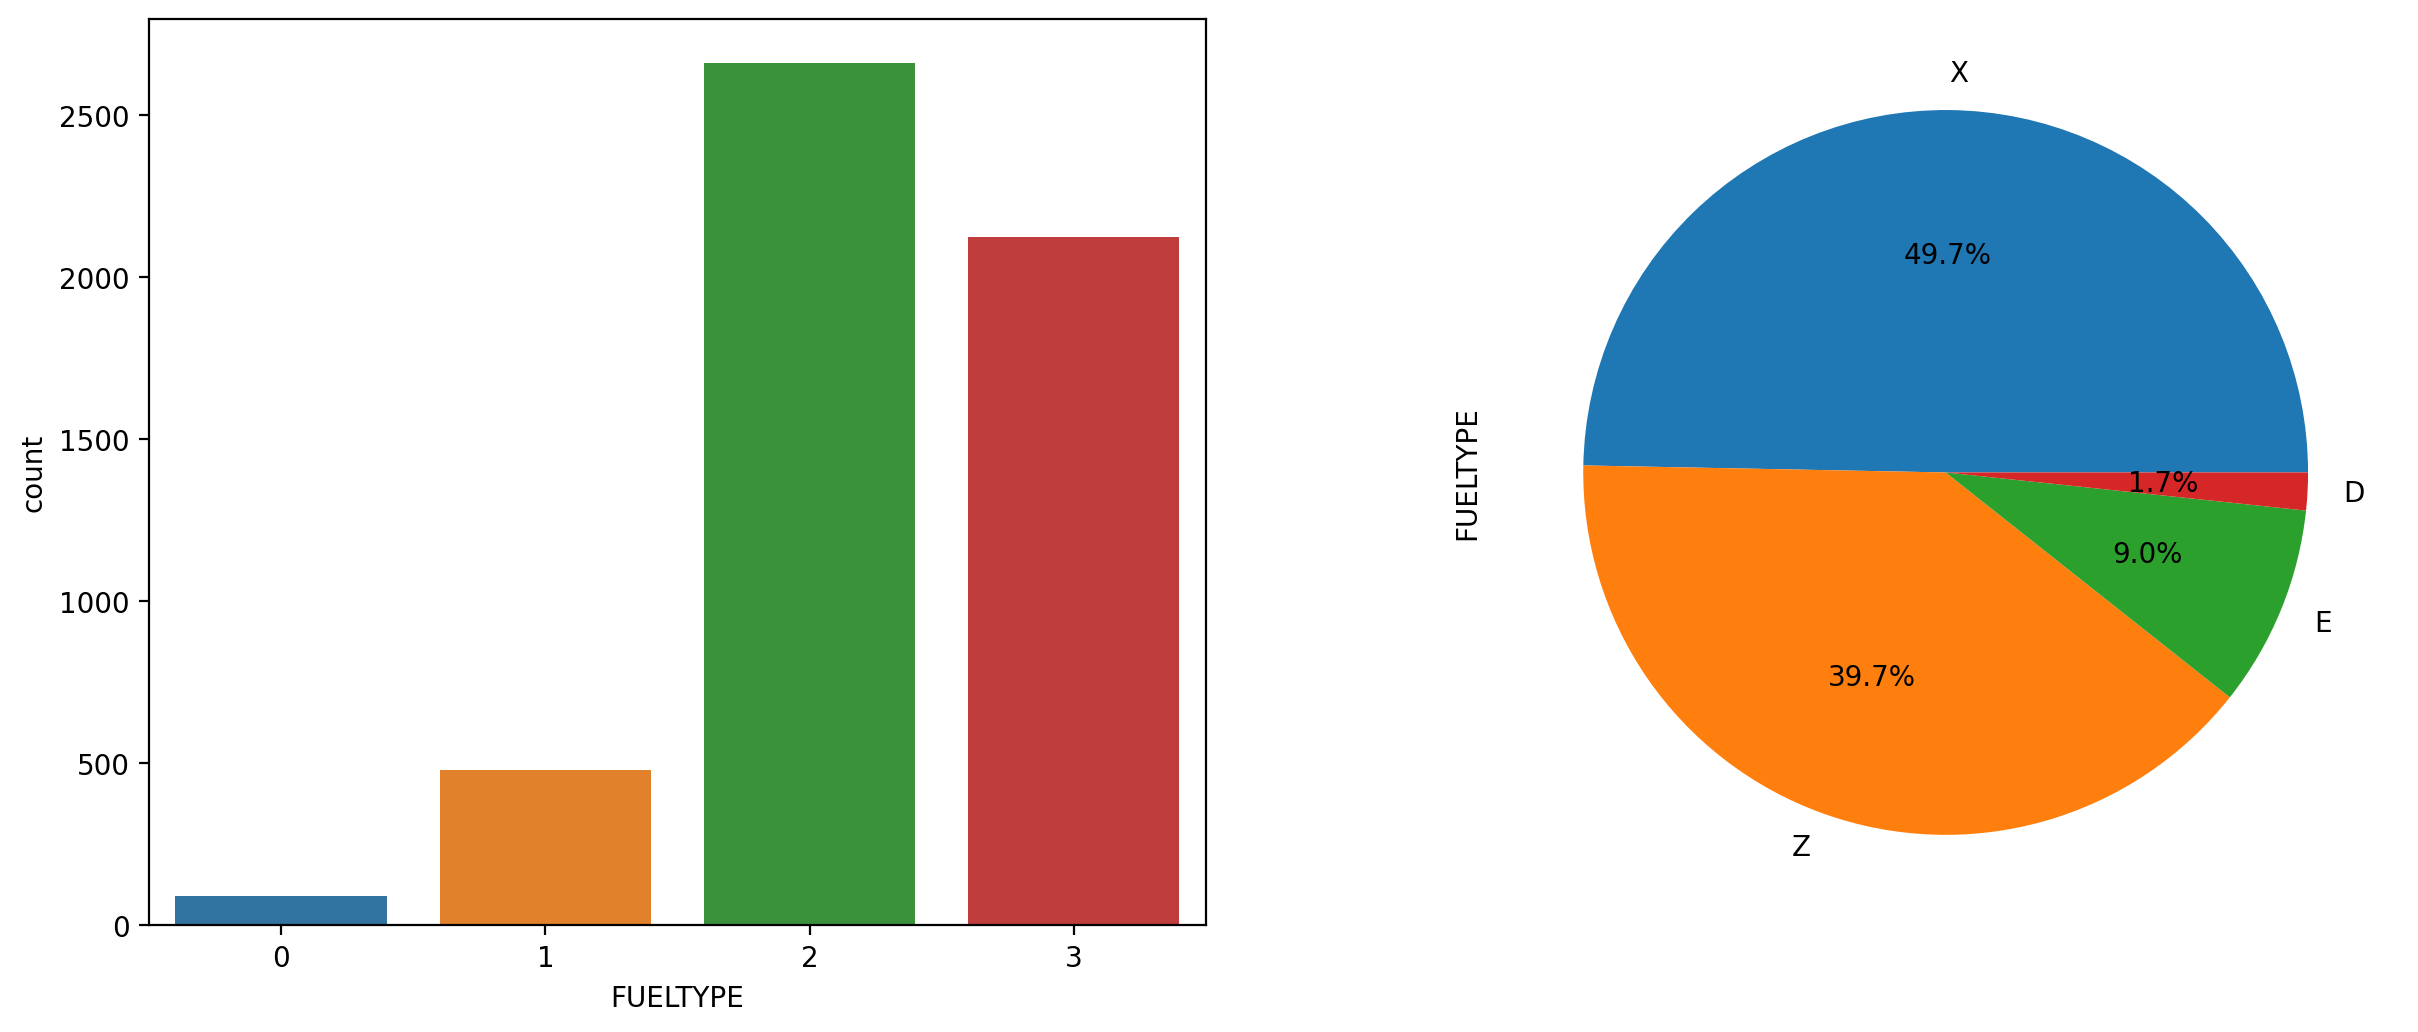

In [76]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting
a = sns.countplot(x='FUELTYPE', data=new_df_le, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0
a= df['FUELTYPE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1

In [77]:
X = new_df_le.drop('FUELTYPE', axis = 1) 
y = new_df_le['FUELTYPE']

In [78]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created 
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

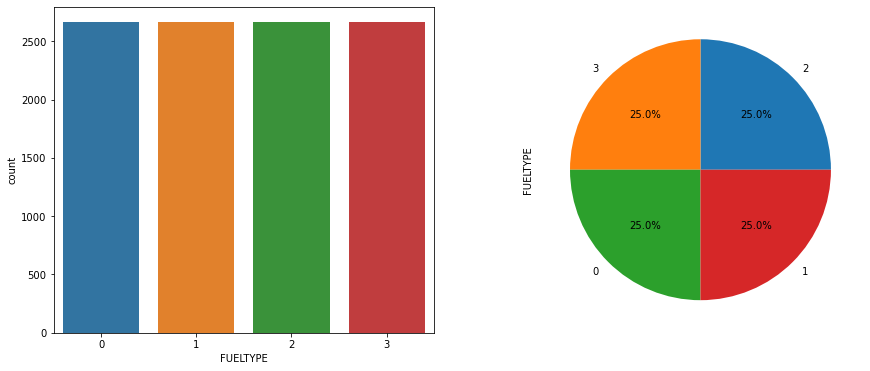

In [79]:
# Plot of the dataset 
df_bal = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced data
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='FUELTYPE',data=df_bal, ax=ax[0]) # assigning each of the plot to the axis shell
a= df_bal['FUELTYPE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning each of the plot to the axis shell

In [80]:
# feature matrix and target vector
X = df.drop('FUELTYPE', axis=1)
y = df['FUELTYPE']

# numerical and categorical columns
numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

# split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

# scale 
scaler = MinMaxScaler()

#  fit scaler
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#  encode
X_train_encoded, X_val_encoded = onehot_encode(X_train, X_val)

#  define model
classif_model = LogisticRegression()

#  fit model
classif_model.fit(X_train_encoded, y_train)

#  make classifications
classes = classif_model.predict(X_val_encoded)

#  report
print(classification_report(y_val, classes))

              precision    recall  f1-score   support

           D       0.00      0.00      0.00        15
           E       1.00      0.98      0.99        99
           X       0.74      0.73      0.73       539
           Z       0.67      0.71      0.69       419

    accuracy                           0.73      1072
   macro avg       0.60      0.60      0.60      1072
weighted avg       0.73      0.73      0.73      1072



C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Vehicle Class

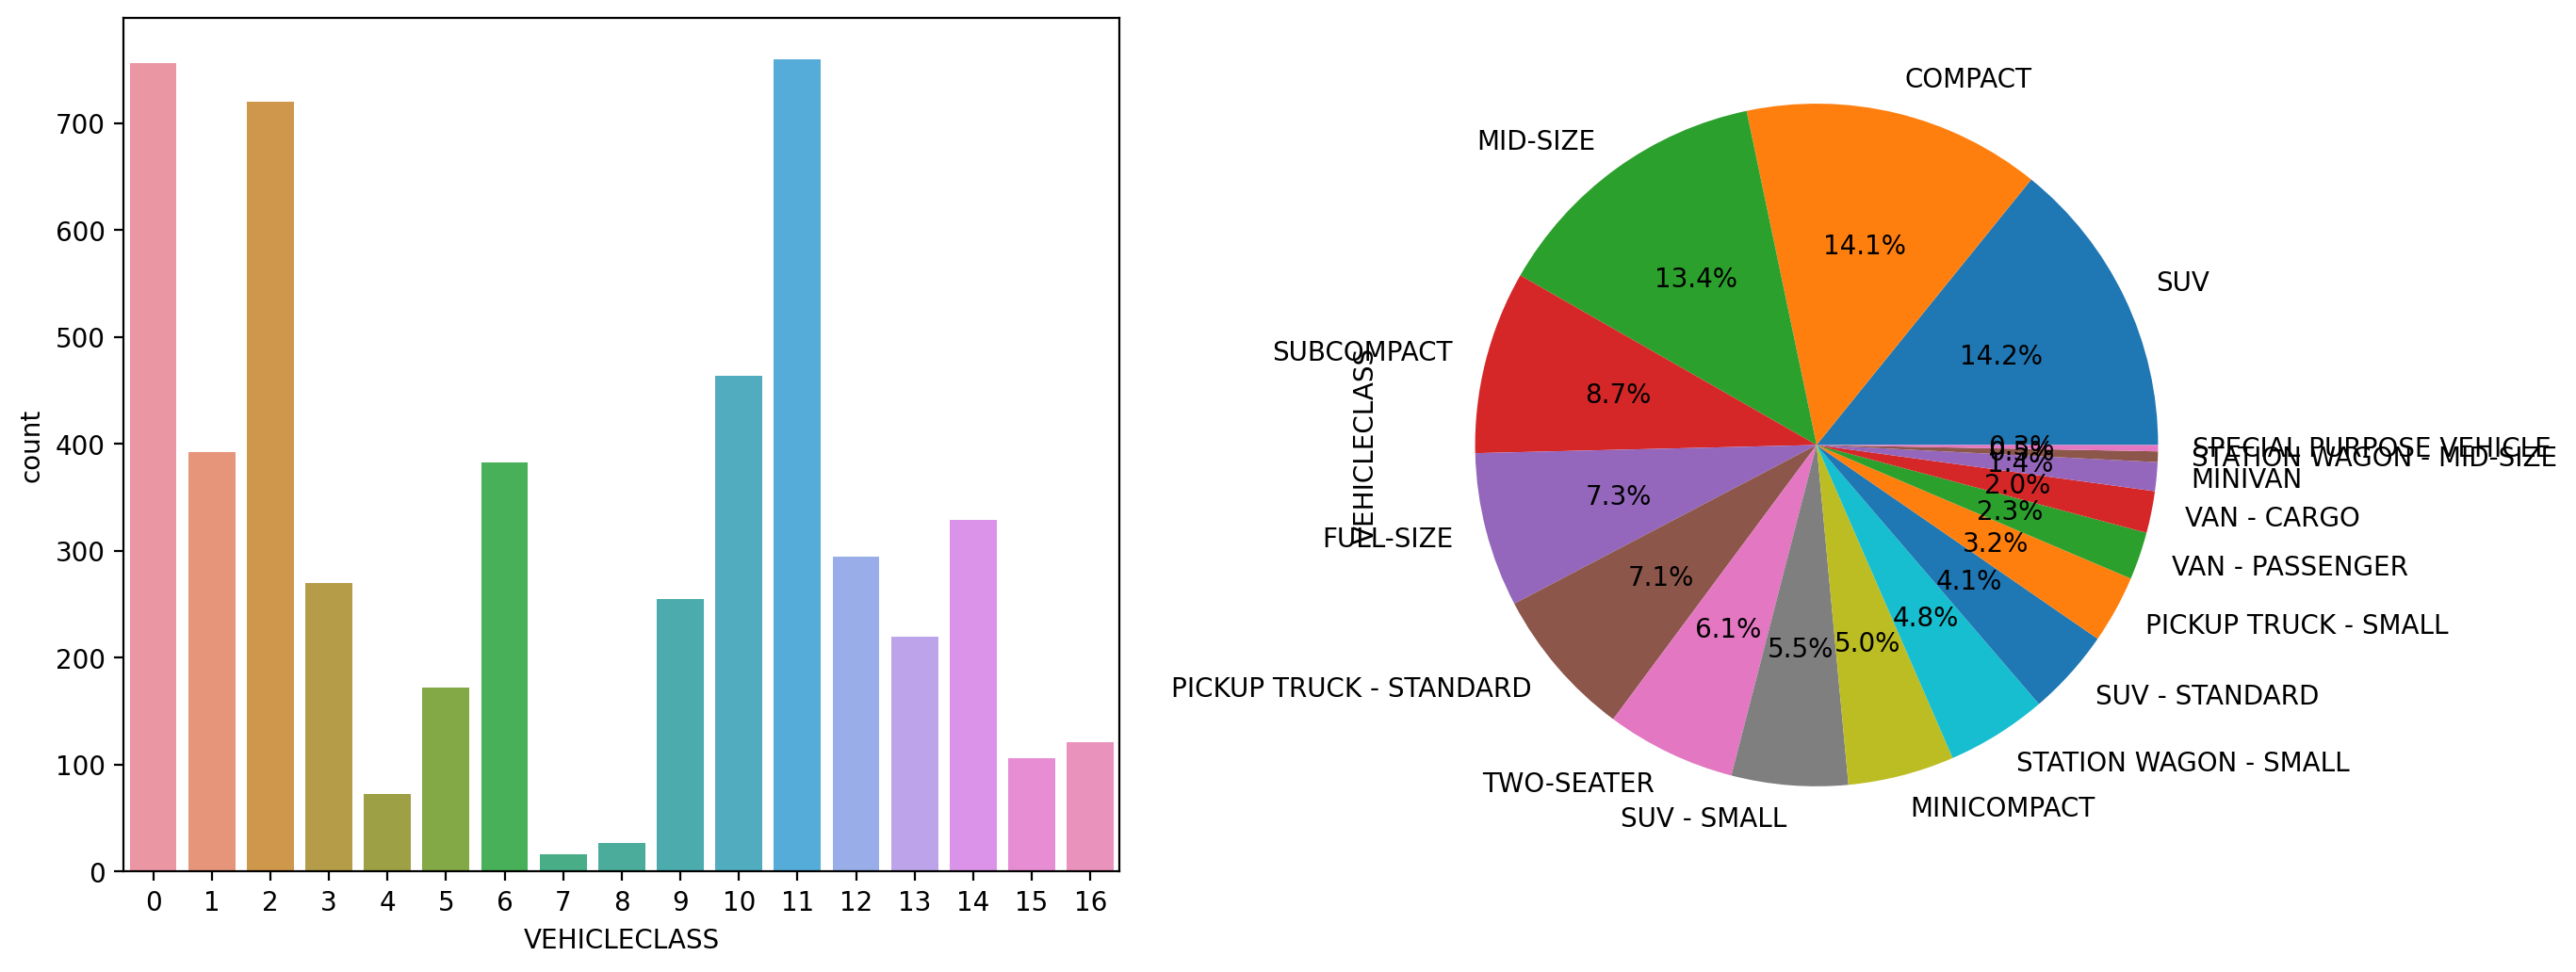

In [81]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting
a = sns.countplot(x='VEHICLECLASS', data=new_cat_le, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0
a= df['VEHICLECLASS'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1

In [82]:
X = new_cat_le.drop(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis = 1) 
y = new_cat_le['VEHICLECLASS']

In [83]:
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created 
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

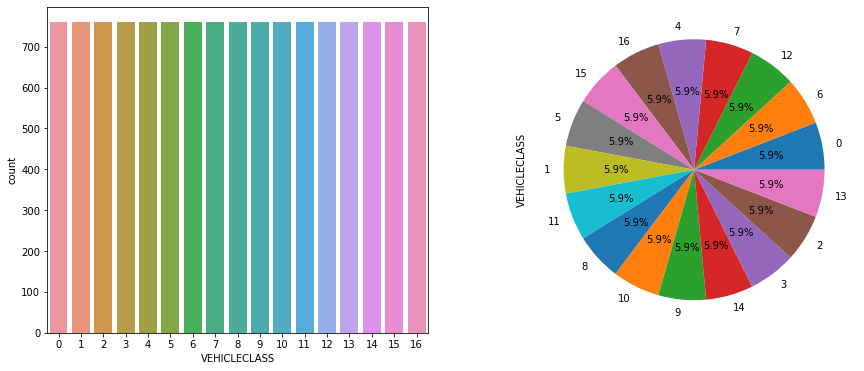

In [84]:
# Plot of the dataset 
df_bal = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced data
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='VEHICLECLASS',data=df_bal, ax=ax[0]) # assigning each of the plot to the axis shell
a= df_bal['VEHICLECLASS'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning each of the plot to the axis shell

In [85]:
# feature matrix and target vector
X = df.drop('VEHICLECLASS', axis=1)
y = df['VEHICLECLASS']

# numerical and categorical columns
numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

# split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

# scale 
scaler = MinMaxScaler()

#  fit scaler
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#  encode
X_train_encoded, X_val_encoded = onehot_encode(X_train, X_val)

#  define model
classif_model = LogisticRegression()

#  fit model
classif_model.fit(X_train_encoded, y_train)

#  make classifications
classes = classif_model.predict(X_val_encoded)

#  report
print(classification_report(y_val, classes))

                          precision    recall  f1-score   support

                 COMPACT       0.23      0.72      0.35       148
               FULL-SIZE       0.00      0.00      0.00        79
                MID-SIZE       0.16      0.03      0.06       146
             MINICOMPACT       0.00      0.00      0.00        54
                 MINIVAN       0.00      0.00      0.00        20
    PICKUP TRUCK - SMALL       0.00      0.00      0.00        23
 PICKUP TRUCK - STANDARD       0.11      0.07      0.09        85
 SPECIAL PURPOSE VEHICLE       0.00      0.00      0.00         2
STATION WAGON - MID-SIZE       0.00      0.00      0.00         3
   STATION WAGON - SMALL       0.00      0.00      0.00        54
              SUBCOMPACT       0.00      0.00      0.00        92
                     SUV       0.18      0.58      0.28       156
             SUV - SMALL       0.00      0.00      0.00        58
          SUV - STANDARD       0.00      0.00      0.00        44
         

C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

### Transmission

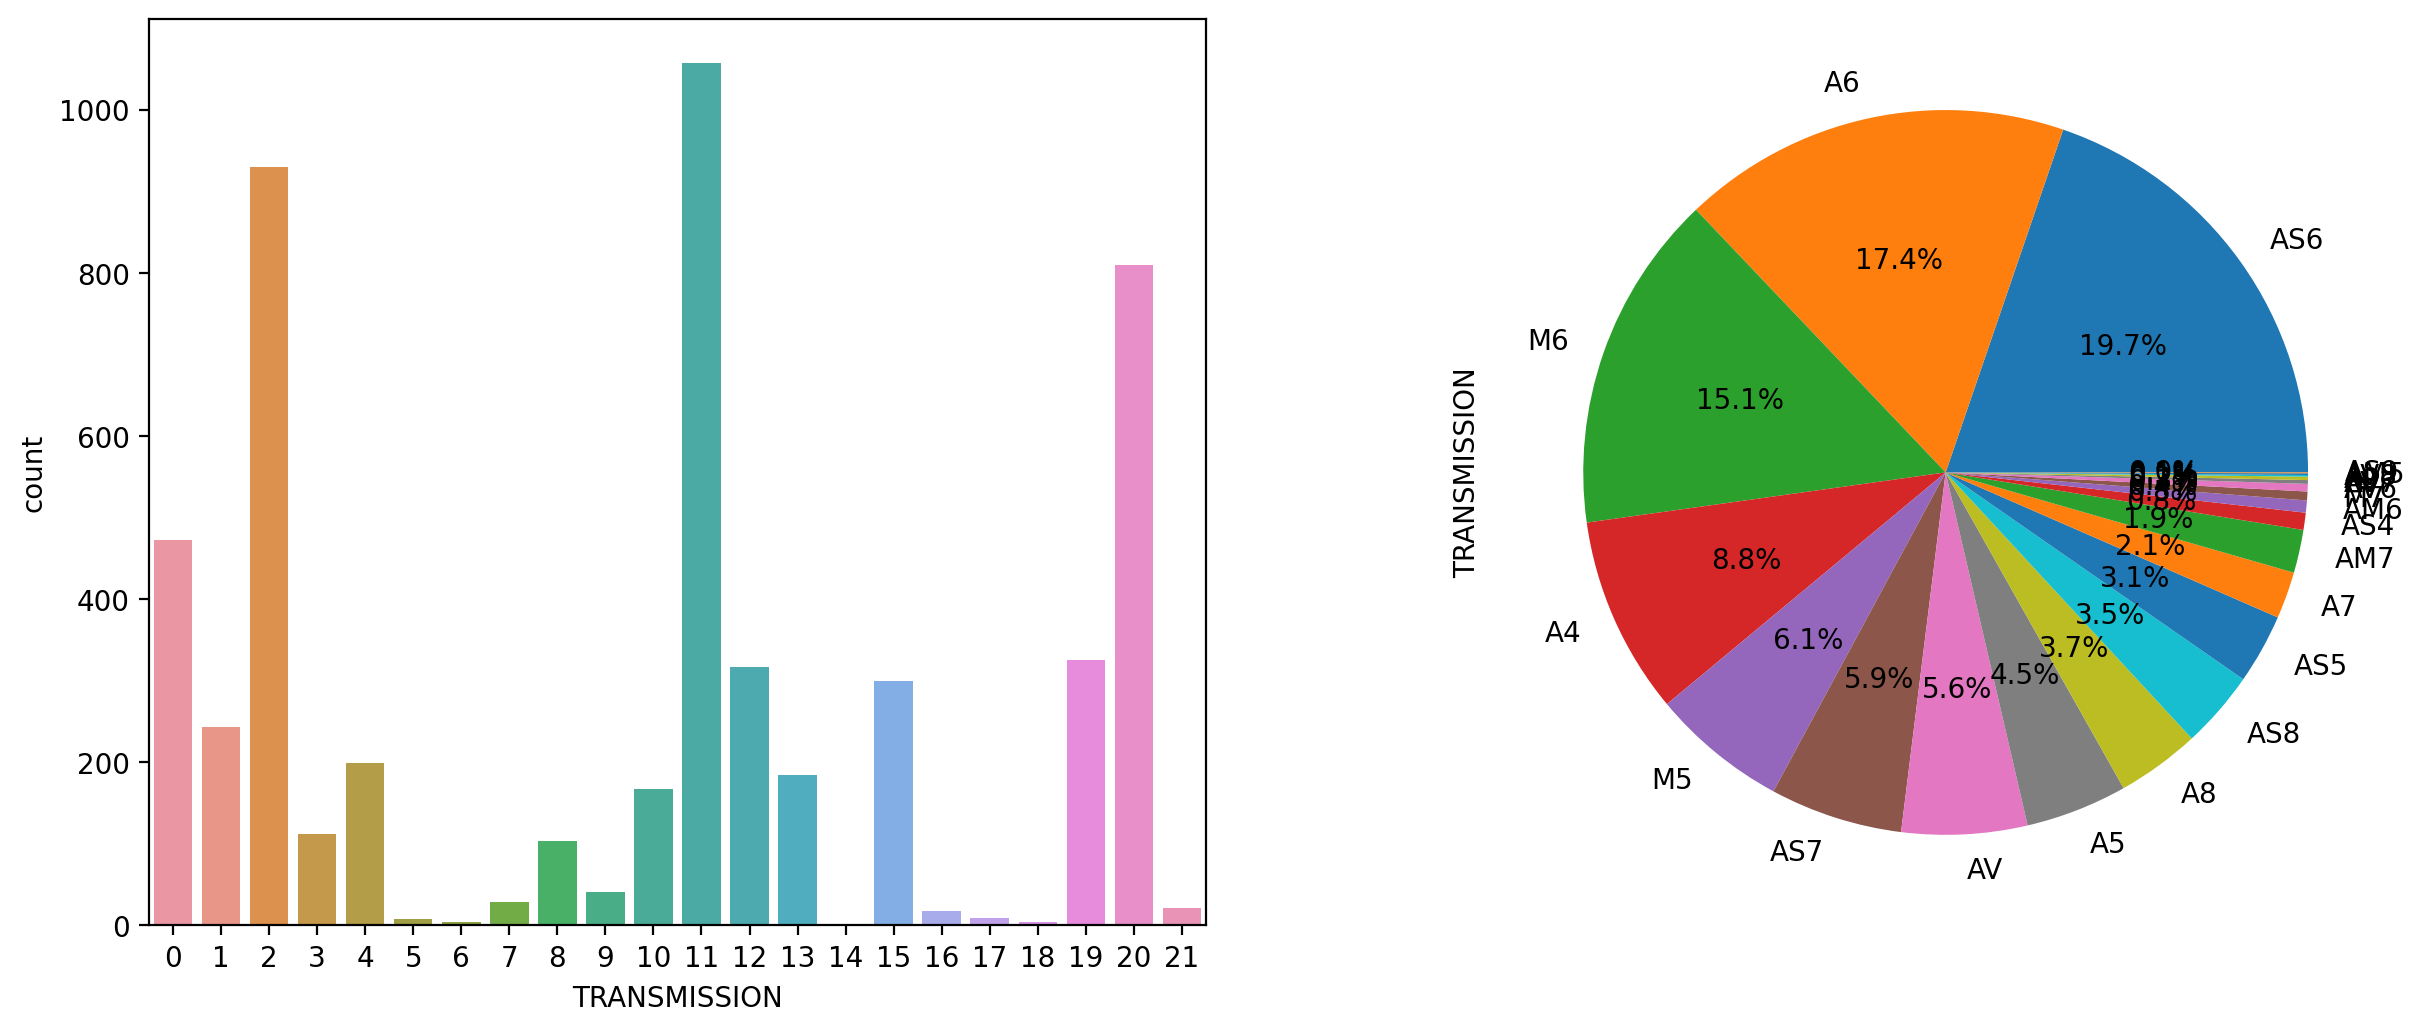

In [86]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting
a = sns.countplot(x='TRANSMISSION', data=new_cat_le, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0
a= df['TRANSMISSION'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1

In [87]:
X = new_cat_le.drop(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis = 1) 
y = new_cat_le['TRANSMISSION']

In [88]:
try:
    sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created 
    X_res, y_res = sm.fit_resample(X, y) # The object is applied
    X, y = X_res, y_res # reassigning the balanced dataset to X,y
except ValueError as v_err:
    print('Sorry: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 3')

Sorry: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 3


Sorry: Could not interpret input "TRANSMISSION"


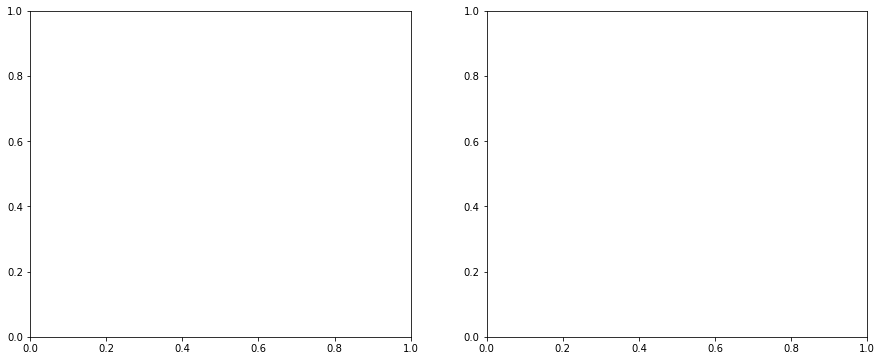

In [89]:
# Plot of the dataset 
try:
    df_bal = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced data
    fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
    a = sns.countplot(x='TRANSMISSION',data=df_bal, ax=ax[0]) # assigning each of the plot to the axis shell
    a= df_bal['TRANSMISSION'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning each of the plot to the axis shell
except ValueError as v_err:
    print('Sorry: Could not interpret input "TRANSMISSION"')

In [90]:
# feature matrix and target vector
X = df.drop('TRANSMISSION', axis=1)
y = df['TRANSMISSION']

# numerical and categorical columns
numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

# split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

# scale 
scaler = MinMaxScaler()

#  fit scaler
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#  encode
X_train_encoded, X_val_encoded = onehot_encode(X_train, X_val)

#  define model
classif_model = LogisticRegression()

#  fit model
classif_model.fit(X_train_encoded, y_train)

#  make classifications
classes = classif_model.predict(X_val_encoded)

#  report
print(classification_report(y_val, classes))

              precision    recall  f1-score   support

          A4       0.00      0.00      0.00       102
          A5       0.00      0.00      0.00        51
          A6       0.27      0.54      0.36       184
          A7       0.00      0.00      0.00        20
          A8       0.00      0.00      0.00        40
          A9       0.00      0.00      0.00         2
         AM5       0.00      0.00      0.00         2
         AM6       0.00      0.00      0.00         5
         AM7       0.00      0.00      0.00        25
         AS4       0.00      0.00      0.00        13
         AS5       0.00      0.00      0.00        30
         AS6       0.23      0.73      0.35       210
         AS7       0.00      0.00      0.00        67
         AS8       0.00      0.00      0.00        33
          AV       0.25      0.22      0.23        60
         AV6       0.00      0.00      0.00         3
         AV7       0.00      0.00      0.00         1
         AV8       0.00    

C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

### Model

In [91]:
# feature matrix and target vector
X = df.drop('MODEL', axis=1)
y = df['MODEL']

# numerical and categorical columns
numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

# split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

# scale 
scaler = MinMaxScaler()

#  fit scaler
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#  encode
X_train_encoded, X_val_encoded = onehot_encode(X_train, X_val)

#  define model
classif_model = LogisticRegression()

#  fit model
classif_model.fit(X_train_encoded, y_train)

#  make classifications
classes = classif_model.predict(X_val_encoded)

#  report
print(classification_report(y_val, classes))

                                        precision    recall  f1-score   support

                        128i CABRIOLET       0.00      0.00      0.00         3
                        135i CABRIOLET       0.00      0.00      0.00         2
                            135i COUPE       0.00      0.00      0.00         1
                            1500 (MDS)       0.00      0.00      0.00         1
              1500 4X4 (FuelSaver MDS)       0.00      0.00      0.00         2
                        1500 4X4 (MDS)       0.00      0.00      0.00         1
                          1500 4X4 FFV       0.00      0.00      0.00         1
                              1500 FFV       0.00      0.00      0.00         2
                          1500 FFV 4X4       0.00      0.00      0.00         2
                   200 CONVERTIBLE FFV       0.00      0.00      0.00         4
                               200 FFV       0.00      0.00      0.00         1
                         200 SEDAN FFV 

C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

### Make

In [92]:
# feature matrix and target vector
X = df.drop('MAKE', axis=1)
y = df['MAKE']

# numerical and categorical columns
numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

# split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

# scale 
scaler = MinMaxScaler()

#  fit scaler
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#  encode
X_train_encoded, X_val_encoded = onehot_encode(X_train, X_val)

#  define model
classif_model = LogisticRegression()

#  fit model
classif_model.fit(X_train_encoded, y_train)

#  make classifications
classes = classif_model.predict(X_val_encoded)

#  report
print(classification_report(y_val, classes))

               precision    recall  f1-score   support

        ACURA       0.00      0.00      0.00        12
 ASTON MARTIN       0.00      0.00      0.00         4
         AUDI       0.00      0.00      0.00        47
      BENTLEY       0.00      0.00      0.00         6
          BMW       0.00      0.00      0.00        74
        BUICK       0.00      0.00      0.00        12
     CADILLAC       0.00      0.00      0.00        27
    CHEVROLET       0.11      0.47      0.18       116
     CHRYSLER       0.00      0.00      0.00        20
        DODGE       0.00      0.00      0.00        39
         FIAT       0.00      0.00      0.00         7
         FORD       0.04      0.14      0.07        83
          GMC       0.18      0.31      0.23        68
        HONDA       0.00      0.00      0.00        24
       HUMMER       0.00      0.00      0.00         3
      HYUNDAI       0.00      0.00      0.00        26
     INFINITI       0.00      0.00      0.00        22
       JA

C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ekegr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l